# Import Required Packages
This section imports pandas and other necessary libraries for data manipulation.

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np

# Load ATSOG CSV Data
Read the ATSOG CSV file into a pandas DataFrame.

In [2]:
# Load ATSOG CSV Data
df = pd.read_csv('Property/atsogo_properties.csv')
df.head()

,title,property_type,transaction_type,location,price,area_sqm,bedrooms,bathrooms,date_posted,description
0,Plot in Area 41,Plot,For Sale,"LILONGWE, Area 41,",85000000.0,0,0,0,2025-06-20 11:00:03,NaN
1,Furnished House,Complete House,For rent,"LILONGWE, New Area 43,",2000.0,0,4,5,2025-06-20 10:41:53,NaN
2,Plot for sale,Land,For Sale,"LILONGWE, Area 46,",115000000.0,2100,0,0,2025-06-03 10:29:12,NaN
3,House for office use,Complete House,For rent,"LILONGWE, Area 6,",2000000.0,0,5,3,2025-05-19 13:16:34,NaN
4,Commercial property,Commercial Property,For Sale,"LILONGWE, Mitundu Trading,",35000000.0,0,0,0,2025-05-19 11:27:04,NaN


# Split Location Column into 'Lilongwe' and 'Area'
Create two new columns: one for the city ('Lilongwe') and another for the area.

In [3]:
# Split Location Column into 'Lilongwe' and 'Area'
df['city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else None)
df['area'] = df['location'].apply(lambda x: x.split(',')[1].strip() if pd.notnull(x) and ',' in x else None)
df[['location', 'city', 'area']].head()

,location,city,area
0,"LILONGWE, Area 41,",LILONGWE,Area 41
1,"LILONGWE, New Area 43,",LILONGWE,New Area 43
2,"LILONGWE, Area 46,",LILONGWE,Area 46
3,"LILONGWE, Area 6,",LILONGWE,Area 6
4,"LILONGWE, Mitundu Trading,",LILONGWE,Mitundu Trading


# Extract Month from Date Column
Create a new column that extracts the month from the 'date_posted' column.

In [4]:
# Extract Month from Date Column
df['month'] = pd.to_datetime(df['date_posted'], errors='coerce').dt.month
df[['date_posted', 'month']].head()

,date_posted,month
0,2025-06-20 11:00:03,6
1,2025-06-20 10:41:53,6
2,2025-06-03 10:29:12,6
3,2025-05-19 13:16:34,5
4,2025-05-19 11:27:04,5


In [5]:
df.head()

,title,property_type,transaction_type,location,price,area_sqm,bedrooms,bathrooms,date_posted,description,city,area,month
0,Plot in Area 41,Plot,For Sale,"LILONGWE, Area 41,",85000000.0,0,0,0,2025-06-20 11:00:03,NaN,LILONGWE,Area 41,6
1,Furnished House,Complete House,For rent,"LILONGWE, New Area 43,",2000.0,0,4,5,2025-06-20 10:41:53,NaN,LILONGWE,New Area 43,6
2,Plot for sale,Land,For Sale,"LILONGWE, Area 46,",115000000.0,2100,0,0,2025-06-03 10:29:12,NaN,LILONGWE,Area 46,6
3,House for office use,Complete House,For rent,"LILONGWE, Area 6,",2000000.0,0,5,3,2025-05-19 13:16:34,NaN,LILONGWE,Area 6,5
4,Commercial property,Commercial Property,For Sale,"LILONGWE, Mitundu Trading,",35000000.0,0,0,0,2025-05-19 11:27:04,NaN,LILONGWE,Mitundu Trading,5


In [17]:
pd.crosstab(df['area'], df['property_type'], margins=True, margins_name='Total')

property_type,Commercial Property,Complete House,Incompleted House,Land,Plot,Total
area,,,,,,
Area 41,0,0,0,0,152,152
Area 43,0,0,0,0,152,152
Area 46,0,0,0,152,0,152
Area 49 Baghdad,0,0,152,0,0,152
Area 6,0,152,0,0,0,152
Mitundu Trading,152,0,0,0,0,152
New Area 43,0,152,0,0,0,152
Old Area 10,152,0,0,0,0,152
Total,304,304,152,152,304,1216


In [6]:
# Convert month number to month name and drop location column
df['month'] = pd.to_datetime(df['date_posted'], errors='coerce').dt.month_name()
df = df.drop(columns=['location'])
df.head()

,title,property_type,transaction_type,price,area_sqm,bedrooms,bathrooms,date_posted,description,city,area,month
0,Plot in Area 41,Plot,For Sale,85000000.0,0,0,0,2025-06-20 11:00:03,NaN,LILONGWE,Area 41,June
1,Furnished House,Complete House,For rent,2000.0,0,4,5,2025-06-20 10:41:53,NaN,LILONGWE,New Area 43,June
2,Plot for sale,Land,For Sale,115000000.0,2100,0,0,2025-06-03 10:29:12,NaN,LILONGWE,Area 46,June
3,House for office use,Complete House,For rent,2000000.0,0,5,3,2025-05-19 13:16:34,NaN,LILONGWE,Area 6,May
4,Commercial property,Commercial Property,For Sale,35000000.0,0,0,0,2025-05-19 11:27:04,NaN,LILONGWE,Mitundu Trading,May


# Exploratory Data Analysis
Analyze the property data using tables and visualizations.

In [7]:
# Summary statistics
df.describe(include='all')

# Value counts for city and area
df['city'].value_counts()
df['area'].value_counts()

area
Area 41            152
New Area 43        152
Area 46            152
Area 6             152
Mitundu Trading    152
Area 43            152
Old Area 10        152
Area 49 Baghdad    152
Name: count, dtype: int64

In [16]:
df['property_type'].value_counts()

property_type
Plot                   304
Complete House         304
Commercial Property    304
Land                   152
Incompleted House      152
Name: count, dtype: int64

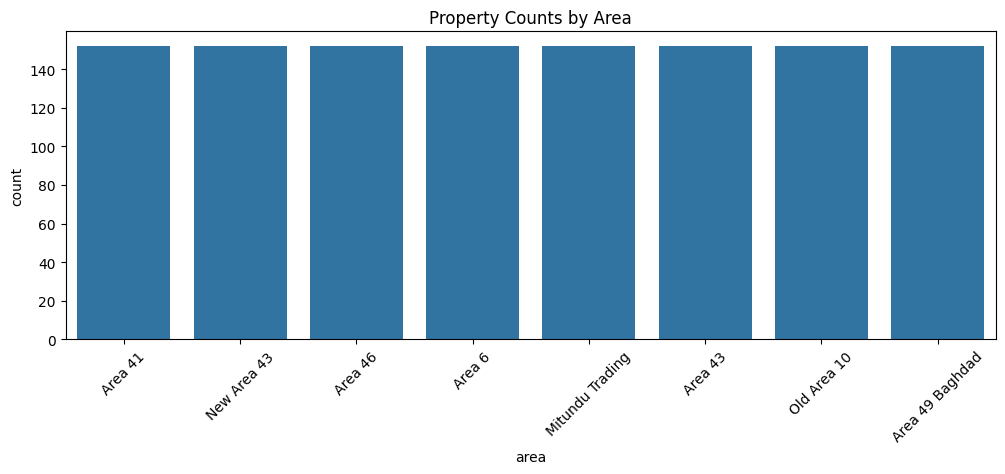

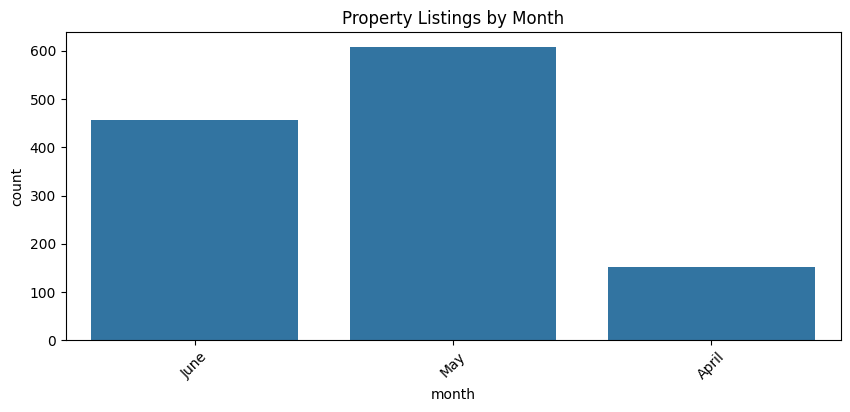

In [9]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='area', order=df['area'].value_counts().index)
plt.title('Property Counts by Area')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='month', order=df['month'].dropna().unique())
plt.title('Property Listings by Month')
plt.xticks(rotation=45)
plt.show()

In [15]:
df['price'].describe().apply(lambda x: f"{x:,.2f}")


count          1,216.00
mean      63,125,250.00
std       58,155,903.85
min            2,000.00
25%        2,750,000.00
50%       60,000,000.00
75%      103,750,000.00
max      165,000,000.00
Name: price, dtype: object

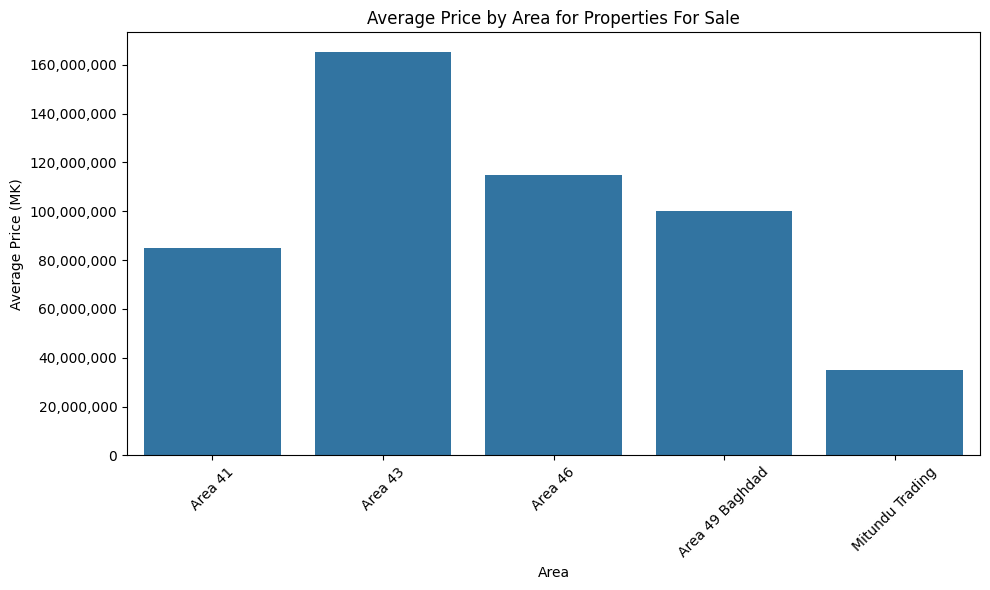

In [ ]:

# Filter data
df_sale = df[df['transaction_type'] == 'For Sale']

# Compute average price per area
avg_price = df_sale.groupby('area')['price'].mean().reset_index()

plt.figure(figsize=(10,6))

# Bar chart
sns.barplot(data=avg_price, x='area', y='price')

plt.title('Average Price by Area for Properties For Sale')
plt.ylabel('Average Price (MK)')
plt.xlabel('Area')
plt.xticks(rotation=45)

# Format y-axis (no scientific notation, with commas)
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()
